In [1]:
# Customer Segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn
warnings.filterwarnings("ignore")

In [2]:
Data_train=pd.read_csv("Train.csv").drop(columns=["ID"])
Data_test=pd.read_csv("Test.csv")

In [3]:
listoftrain=[]
print("Total Train Data :",len(Data_train))
for i in Data_train.columns:
    print(f'{i}:',len(Data_train[i].unique()))
    print(f'{i} Nan Values: :',sum(Data_train[i].isna()))
    listoftrain.append(i)
    listoftrain.append(len(Data_train[i].unique()))
    listoftrain.append(sum(Data_train[i].isna()))
    if Data_train[i].dtype=="int64":
      print(f'{i} Mean:',Data_train[i].mean())
      listoftrain.append(Data_train[i].mean())
    else:
      print(f'{i} Mode:',Data_train[i].mode().values[0])
      listoftrain.append(Data_train[i].mode().values[0])

Train_data_result=pd.DataFrame(np.array(listoftrain).reshape((10,4)),columns=["Feature","Unique","NanValues","Mode"])

Total Train Data : 8068
Gender: 2
Gender Nan Values: : 0
Gender Mode: Male
Ever_Married: 3
Ever_Married Nan Values: : 140
Ever_Married Mode: Yes
Age: 67
Age Nan Values: : 0
Age Mean: 43.46690629647992
Graduated: 3
Graduated Nan Values: : 78
Graduated Mode: Yes
Profession: 10
Profession Nan Values: : 124
Profession Mode: Artist
Work_Experience: 16
Work_Experience Nan Values: : 829
Work_Experience Mode: 1.0
Spending_Score: 3
Spending_Score Nan Values: : 0
Spending_Score Mode: Low
Family_Size: 10
Family_Size Nan Values: : 335
Family_Size Mode: 2.0
Var_1: 8
Var_1 Nan Values: : 76
Var_1 Mode: Cat_6
Segmentation: 4
Segmentation Nan Values: : 0
Segmentation Mode: D


In [4]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [5]:
Data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0


In [6]:
listoftest=[]
print("Total Test Data :",len(Data_test))
for i in Data_test.columns:
    print(f'{i}:',len(Data_test[i].unique()))
    print(f'{i} Nan Values: :',sum(Data_test[i].isna()))
    listoftest.append(i)
    listoftest.append(len(Data_test[i].unique()))
    listoftest.append(sum(Data_test[i].isna()))
    if Data_test[i].dtype=="int64":
      print(f'{i} Mean:',Data_test[i].mean())
      listoftest.append(Data_test[i].mean())
    else:
      print(f'{i} Mode:',Data_test[i].mode().values[0])
      listoftest.append(Data_test[i].mode().values[0])

Test_data_result=pd.DataFrame(np.array(listoftest).reshape((10,4)),columns=["Feature","Unique","NanValues","Mode"])

Total Test Data : 2627
ID: 2627
ID Nan Values: : 0
ID Mean: 463433.91891891893
Gender: 2
Gender Nan Values: : 0
Gender Mode: Male
Ever_Married: 3
Ever_Married Nan Values: : 50
Ever_Married Mode: Yes
Age: 67
Age Nan Values: : 0
Age Mean: 43.649790635706125
Graduated: 3
Graduated Nan Values: : 24
Graduated Mode: Yes
Profession: 10
Profession Nan Values: : 38
Profession Mode: Artist
Work_Experience: 16
Work_Experience Nan Values: : 269
Work_Experience Mode: 1.0
Spending_Score: 3
Spending_Score Nan Values: : 0
Spending_Score Mode: Low
Family_Size: 10
Family_Size Nan Values: : 113
Family_Size Mode: 2.0
Var_1: 8
Var_1 Nan Values: : 32
Var_1 Mode: Cat_6


In [7]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [8]:
Data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0


In [9]:
pd.concat([Train_data_result,Test_data_result],axis=1)

,Feature,Unique,NanValues,Mode,Feature,Unique,NanValues,Mode
0,Gender,2,0,Male,ID,2627,0,463433.91891891893
1,Ever_Married,3,140,Yes,Gender,2,0,Male
2,Age,67,0,43.46690629647992,Ever_Married,3,50,Yes
3,Graduated,3,78,Yes,Age,67,0,43.649790635706125
4,Profession,10,124,Artist,Graduated,3,24,Yes
5,Work_Experience,16,829,1.0,Profession,10,38,Artist
6,Spending_Score,3,0,Low,Work_Experience,16,269,1.0
7,Family_Size,10,335,2.0,Spending_Score,3,0,Low
8,Var_1,8,76,Cat_6,Family_Size,10,113,2.0
9,Segmentation,4,0,D,Var_1,8,32,Cat_6


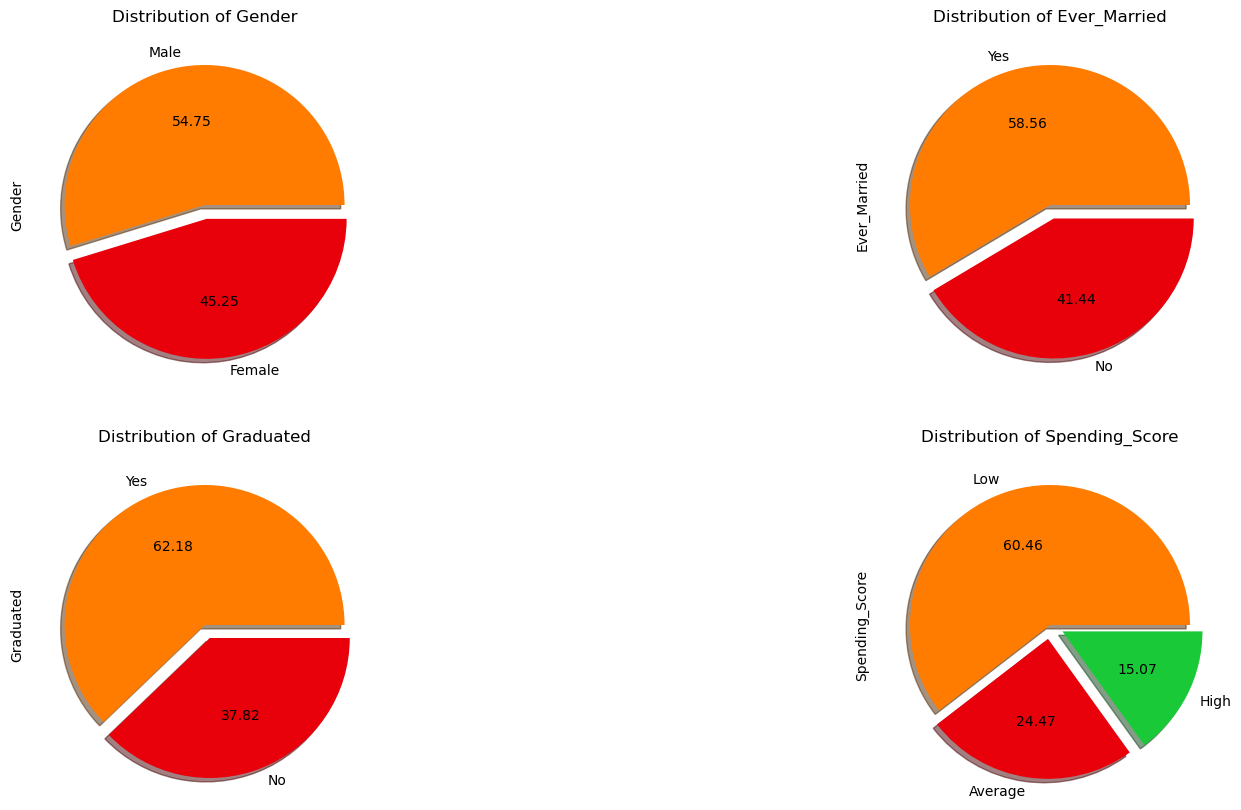

In [10]:
# Visualization

f, ax  = plt.subplots(2,2,figsize = (20,10))
colors=["#FF7C00", "#E8000B","#1AC938"]
Data_train['Gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

Data_train['Ever_Married'].value_counts().plot.pie(title='Distribution of Ever_Married',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

Data_train['Graduated'].value_counts().plot.pie(title='Distribution of Graduated',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

Data_train['Spending_Score'].value_counts().plot.pie(title='Distribution of Spending_Score',
                                                   ax=ax[1][1],explode=[0,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline 
def createPlot(data, col:str, ttext:str, xtext:str, ytext:str) -> None:
    """
    this function creates histogram and boxplot by pyplot library and also count skewness
    
    Arguments:
    data -- pandas dataframe
    col -- column name which we want to plot
    ttext -- string which we want to write on top of the graph
    xtext -- string which we want to write on x axis
    ytext -- string which we want to write on y axis
    
    Returns:
    None
    """ 
    plotly.offline.init_notebook_mode(connected=True)
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Histogram(x=data[col],marker_color='#6a6fff'),row=1,col=1)
    fig.add_trace(go.Box(x=data[col]),row=1,col=2)
    
    fig.update_layout(
        title_text=ttext,
        xaxis_title_text=xtext,
        yaxis_title_text=ytext, 
        bargap=0.05, 
        template = 'plotly_dark',
        width=900, height=600
    )
    
    fig.show()

In [12]:
createPlot(Data_train,"Age","Age distribution","Age","count")

In [13]:
createPlot(Data_train,"Work_Experience","Work_Experience distribution","Work_Experience","count")

In [14]:
createPlot(Data_train,"Family_Size","Family_Size distribution","Family_Size","count")

In [15]:
# None values check

for i in Data_train["Segmentation"].unique():
  print(i)
  print("Values Count:",len(Data_train[Data_train["Segmentation"]==i]))
  print("Total: ",Data_train[Data_train["Segmentation"]==i].isna().sum().sum())

D
Values Count: 2268
Total:  588
A
Values Count: 1972
Total:  399
B
Values Count: 1858
Total:  319
C
Values Count: 1970
Total:  276


In [16]:
# None values Add(mode)

for i in Data_train.columns:
  if sum(Data_train[i].isna())!=0:
    Data_train[i+"_add_val"]=Data_train[i].isna()
    if i!=["Age","Work_Experience","Family_Size"]:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mode().values[0])
    else:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mean())

In [17]:
for i in Data_test.columns:
  if sum(Data_test[i].isna())!=0:
    Data_test[i+"_add_val"]=Data_test[i].isna()
    if i!=["Age","Work_Experience","Family_Size"]:
      Data_test[i]=Data_test[i].fillna(Data_test[i].mode().values[0])
    else:
      Data_test[i]=Data_test[i].fillna(Data_test[i].mean())

In [18]:
# Encoding (Train)

Data_train["Gender"]=pd.get_dummies(Data_train["Gender"],drop_first=True)
Data_train["Ever_Married"]=pd.get_dummies(Data_train["Ever_Married"],drop_first=True)
Data_train["Graduated"]=pd.get_dummies(Data_train["Graduated"],drop_first=True)
Data_train["Ever_Married_add_val"]=pd.get_dummies(Data_train["Ever_Married_add_val"],drop_first=True)
Data_train["Graduated_add_val"]=pd.get_dummies(Data_train["Graduated_add_val"],drop_first=True)
Data_train["Profession_add_val"]=pd.get_dummies(Data_train["Profession_add_val"],drop_first=True)
Data_train["Work_Experience_add_val"]=pd.get_dummies(Data_train["Work_Experience_add_val"],drop_first=True)
Data_train["Family_Size_add_val"]=pd.get_dummies(Data_train["Family_Size_add_val"],drop_first=True)
Data_train["Var_1_add_val"]=pd.get_dummies(Data_train["Var_1_add_val"],drop_first=True)

In [19]:
new_Data_train=pd.concat([Data_train,pd.get_dummies(Data_train["Profession"],drop_first=True),pd.get_dummies(Data_train["Spending_Score"],drop_first=True),pd.get_dummies(Data_train["Var_1"],drop_first=True)],axis=1)
new_Data_train=new_Data_train.drop(columns=["Profession","Spending_Score","Var_1"])
new_Data_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Ever_Married_add_val,Graduated_add_val,Profession_add_val,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,1,0,22,0,1.0,4.0,D,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,38,1,1.0,3.0,A,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,B,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,67,1,0.0,2.0,B,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0,1,40,1,1.0,6.0,A,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0.0,7.0,D,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8064,1,0,35,0,3.0,4.0,D,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8065,0,0,33,1,1.0,1.0,D,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,0,0,27,1,1.0,4.0,B,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# Encoding (Test)

Data_test["Gender"]=pd.get_dummies(Data_test["Gender"],drop_first=True)
Data_test["Ever_Married"]=pd.get_dummies(Data_test["Ever_Married"],drop_first=True)
Data_test["Graduated"]=pd.get_dummies(Data_test["Graduated"],drop_first=True)
Data_test["Ever_Married_add_val"]=pd.get_dummies(Data_test["Ever_Married_add_val"],drop_first=True)
Data_test["Graduated_add_val"]=pd.get_dummies(Data_test["Graduated_add_val"],drop_first=True)
Data_test["Profession_add_val"]=pd.get_dummies(Data_test["Profession_add_val"],drop_first=True)
Data_test["Work_Experience_add_val"]=pd.get_dummies(Data_test["Work_Experience_add_val"],drop_first=True)
Data_test["Family_Size_add_val"]=pd.get_dummies(Data_test["Family_Size_add_val"],drop_first=True)
Data_test["Var_1_add_val"]=pd.get_dummies(Data_test["Var_1_add_val"],drop_first=True)

In [21]:
new_Data_test=pd.concat([Data_test,pd.get_dummies(Data_test["Profession"],drop_first=True),pd.get_dummies(Data_test["Spending_Score"],drop_first=True),pd.get_dummies(Data_test["Var_1"],drop_first=True)],axis=1)
new_Data_test=new_Data_test.drop(columns=["Profession","Spending_Score","Var_1"])
new_Data_test

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Ever_Married_add_val,Graduated_add_val,Profession_add_val,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,458989,0,1,36,1,0.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,458994,1,1,37,1,8.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,458996,0,1,69,0,0.0,1.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,459000,1,1,59,0,11.0,2.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,459001,0,0,19,0,1.0,4.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,9.0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2623,467958,0,0,35,1,1.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2624,467960,0,0,53,1,1.0,2.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2625,467961,1,1,47,1,1.0,5.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [22]:
# ML MODELS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
x=new_Data_train.copy().drop(columns=['Segmentation']).values
y=new_Data_train['Segmentation'].values
y=LabelEncoder().fit_transform(y)
map={3:"D",0:"A",1:"B",2:"C"}

In [24]:
print('Train_x:',x.shape)
print('Train_y:',y.shape)

Train_x: (8068, 28)
Train_y: (8068,)


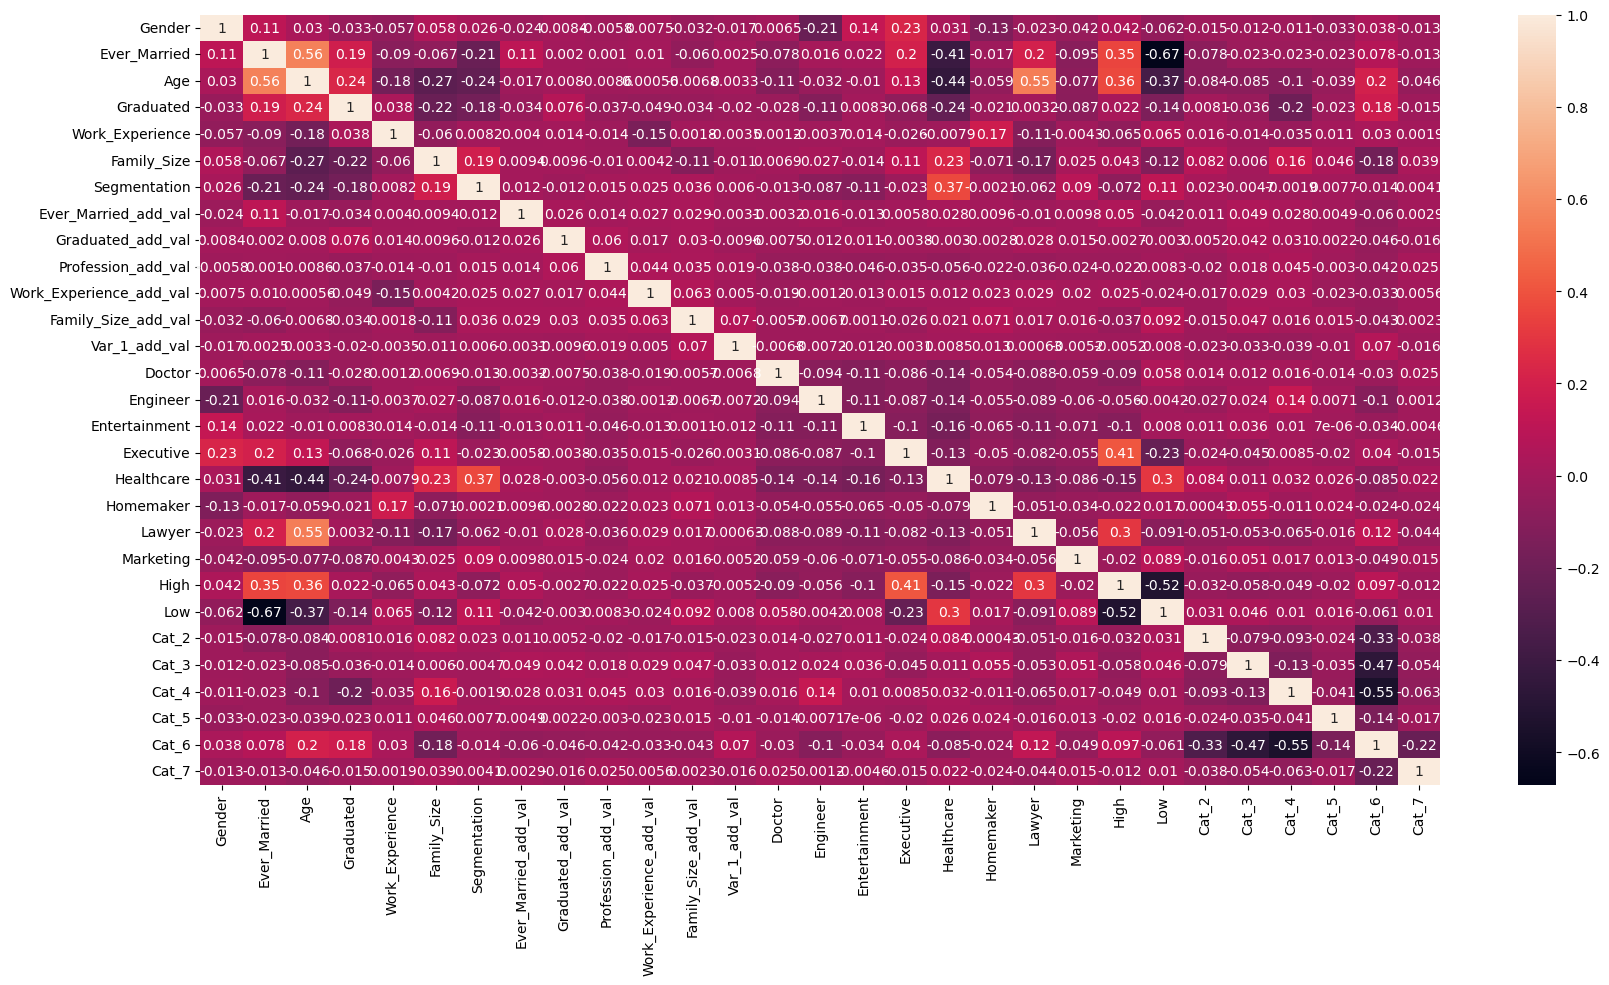

In [25]:
# XG Boost

plt.figure(figsize=(20,10))
new_Data_train_corr=new_Data_train.copy()
new_Data_train_corr["Segmentation"]=LabelEncoder().fit_transform(new_Data_train_corr["Segmentation"])
seaborn.heatmap(new_Data_train_corr.corr(),annot=True)
plt.show()

In [26]:
 import sys

!{sys.executable} -m pip install xgboost

In [27]:
 from xgboost import XGBClassifier

model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x,y)
print(model_xgb.score(x,y))

0.960213187902826


In [28]:
print(classification_report(y,model_xgb.predict(x)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1972
           1       0.94      0.94      0.94      1858
           2       0.95      0.95      0.95      1970
           3       0.98      0.99      0.98      2268

    accuracy                           0.96      8068
   macro avg       0.96      0.96      0.96      8068
weighted avg       0.96      0.96      0.96      8068



In [29]:
result=model_xgb.predict_proba(new_Data_test.copy().drop(columns=["ID"]).values)
result=[[i[np.argmax(i)],map[np.argmax(i)]] for i in result] 
result=pd.DataFrame(data=result,columns=["Proba","Result"])
result=pd.concat([Data_test["ID"],result],axis=1)

In [30]:
result.head()

,ID,Proba,Result
0,458989,0.797371,B
1,458994,0.957300,C
2,458996,0.457922,C
3,459000,0.997223,C
4,459001,0.997227,D
